<a href="https://colab.research.google.com/github/DinakarVempati/AditiclassPractice/blob/main/NLP_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NLP Data Visualization - Fifa WC2022 analysing tweets

1.Sentiment Analysis
2.Social Media Scraping
3.scrape with Snscrape
4.perform Twitter sentiment analysis

**scrape with snscrape**

In [1]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 3.3 MB/s 


Importing Modules 

In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

Creating tweet data

In [3]:
tweets = []
query = '#WorldCup2022 lang:en since:2022-11-20 until:2022-12-18'
q = sntwitter.TwitterSearchScraper(query)
for i,tweet in enumerate(q.get_items()):
    if i>1000:
        break
    tweets.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])
# Converting data to dataframe
tweets_df = pd.DataFrame(tweets, columns=["Date Created", "Number of Likes", "Source of Tweet", "Tweet"])
tweets_df.head()

,Date Created,Number of Likes,Source of Tweet,Tweet
0,2022-12-17 23:58:55+00:00,3,Twitter for Android,What a run by Team Morocco!\n#WorldCup2022 htt...
1,2022-12-17 23:58:35+00:00,1,Twitter for Android,"@FrozenPissDMT O, it's ok my friend 😊 I'm gla..."
2,2022-12-17 23:58:27+00:00,0,Twitter for iPhone,Today is the day #ArgentinaVsFrance #WorldCup...
3,2022-12-17 23:58:00+00:00,0,Twitter for Android,Come on leo messi.\n#ArgentinaVsFrance . #LeoM...
4,2022-12-17 23:57:13+00:00,1,Twitter for Android,World cup can't describe messi !\nThis little ...


Twitter Sentiment Analysis with Hugging Face module.
What is Hugging Face?
please refer the following link to know more about hugging face module.
https://huggingface.co/

Hugging Face is a data science platform and large open-source community that provides tools that help users build, train, and deploy machine learning models, it offers a standardized interface to a wide range of transformer models.

Transformers is natural language processing library made available by Hugging face.


Installing transformers library

In [4]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.7 MB/s 
     |████████████████████████████████| 7.6 MB 43.7 MB/s 
     |████████████████████████████████| 182 kB 68.8 MB/s 


The model we’ll use for this analysis is the [cardiffnl/twitter-roberta-base-sentiment-latest model](https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest), which is a roBERTa-base. This model was trained on ~124 million tweets from January 2018 to December 2021. The easiest way to load this model is to use a pipeline. Pipelines automatically load the model you want and its preprocessing class. Let’s load our model with the pipeline method:

In [5]:
from transformers import pipeline
sentiment_analysis = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

let's find out the sentiment in each tweet with the for loop.

In [6]:
# Creating a list to append all tweet attributes(data)
tweet_sa = []

# Creating query
query = '#WorldCup2022 lang:en since:2022-11-20 until:2022-12-18'
q = sntwitter.TwitterSearchScraper(query)

# Preprocessing text
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Predicting the sentiments of tweets
for i,tweet in enumerate(q.get_items()):
    if i>1000:
        break
    content = tweet.content
    content = preprocess(content)
    sentiment = sentiment_analysis(content)
    tweet_sa.append({"Date Created": tweet.date, "Number of Likes": tweet.likeCount, 
                     "Source of Tweet": tweet.sourceLabel, "Tweet": tweet.content, 'Sentiment': sentiment[0]['label']})

We have collected the data from twitter.
we have to convert it to a dataframe to conduct our data analytics

increasing column width in pandas dataframe

In [7]:
pd.set_option('max_colwidth', None)

In [11]:
tweets_sentiment_df = pd.DataFrame(tweet_sa)
tweets_sentiment_df.head()
#tweets_sentiment_df.tail()

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,2022-12-17 23:58:55+00:00,3,Twitter for Android,What a run by Team Morocco!\n#WorldCup2022 https://t.co/P9uVB7aU20,positive
1,2022-12-17 23:58:35+00:00,1,Twitter for Android,"@FrozenPissDMT O, it's ok my friend 😊 I'm glad you understood what I mean . You know , I miss Virgil so much, didn't see him so long after #WorldCup2022",positive
2,2022-12-17 23:58:27+00:00,0,Twitter for iPhone,Today is the day #ArgentinaVsFrance #WorldCup2022,positive
3,2022-12-17 23:58:00+00:00,0,Twitter for Android,Come on leo messi.\n#ArgentinaVsFrance . #LeoMessi .#VamosArgentina .#WorldCup2022,positive
4,2022-12-17 23:57:13+00:00,1,Twitter for Android,"World cup can't describe messi !\nThis little boy proves everyone degree, trophy, exam marks, money can't describe your talent and hard work. Nor matter messi win or loss WC but your always be untouchable player. #Messi #WorldCup2022 https://t.co/iunTsjj7Jd",positive


# **Data Visualization of above data**

In [15]:
import matplotlib.pyplot as plt

sentiment_counts = tweets_sentiment_df.groupby(['Sentiment']).size()
print(sentiment_counts)

Sentiment
negative    102
neutral     357
positive    542
dtype: int64


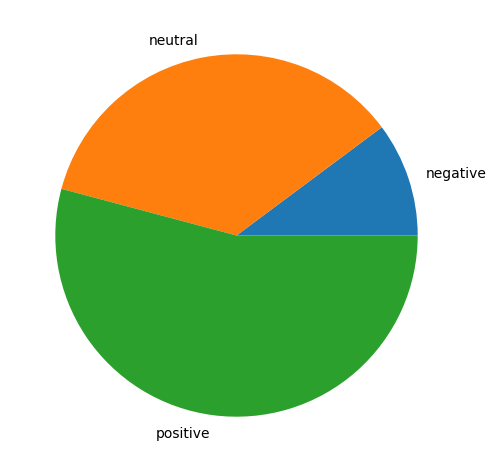

In [22]:
fig = plt.figure(figsize=(6,6), dpi=100)
sentiment_counts.plot.pie(startangle=0, fontsize=10, label="")

For further understanding the nature of tweets we can build a word cloud

In [23]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

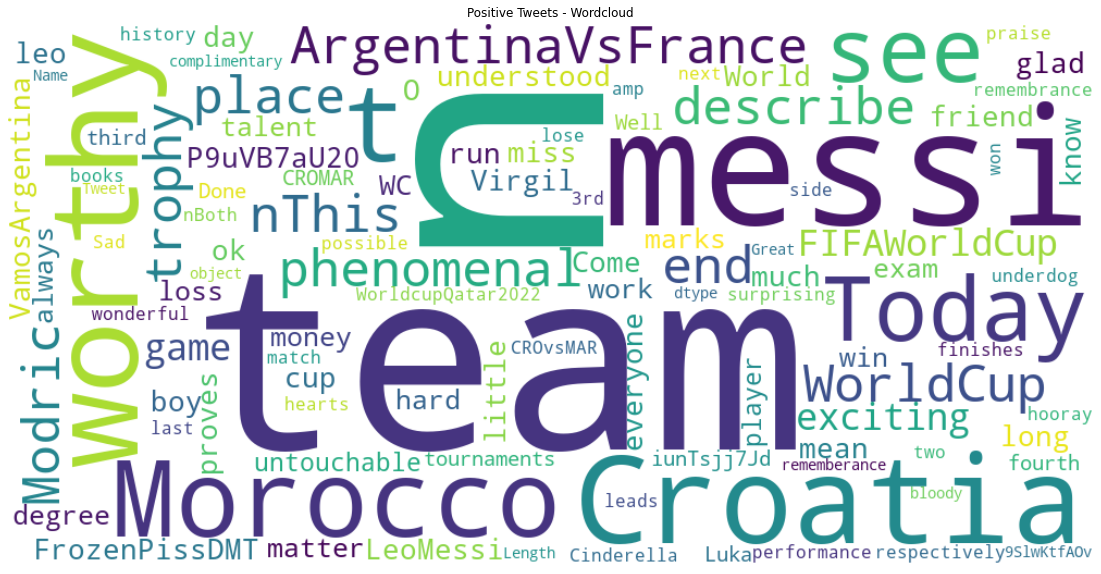

In [26]:
# Wordcloud with positive tweets
positive_tweets = tweets_sentiment_df['Tweet'][tweets_sentiment_df["Sentiment"] == 'positive']
stop_words = ["https", "co", "RT", "WorldCup2022"] + list(STOPWORDS)
positive_wordcloud = WordCloud(width=1000, height=500, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure(figsize=[20,10])
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

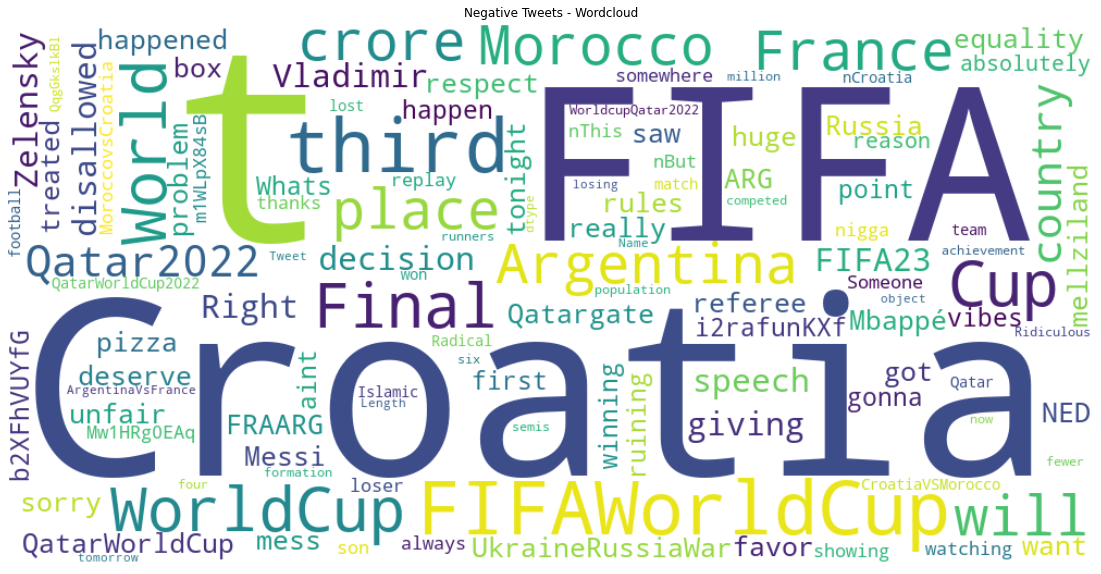

In [28]:
# Wordcloud with Negative tweets
positive_tweets = tweets_sentiment_df['Tweet'][tweets_sentiment_df["Sentiment"] == 'negative']
stop_words = ["https", "co", "RT", "WorldCup2022"] + list(STOPWORDS)
positive_wordcloud = WordCloud(width=1000, height=500, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure(figsize=[20,10])
plt.title("Negative Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

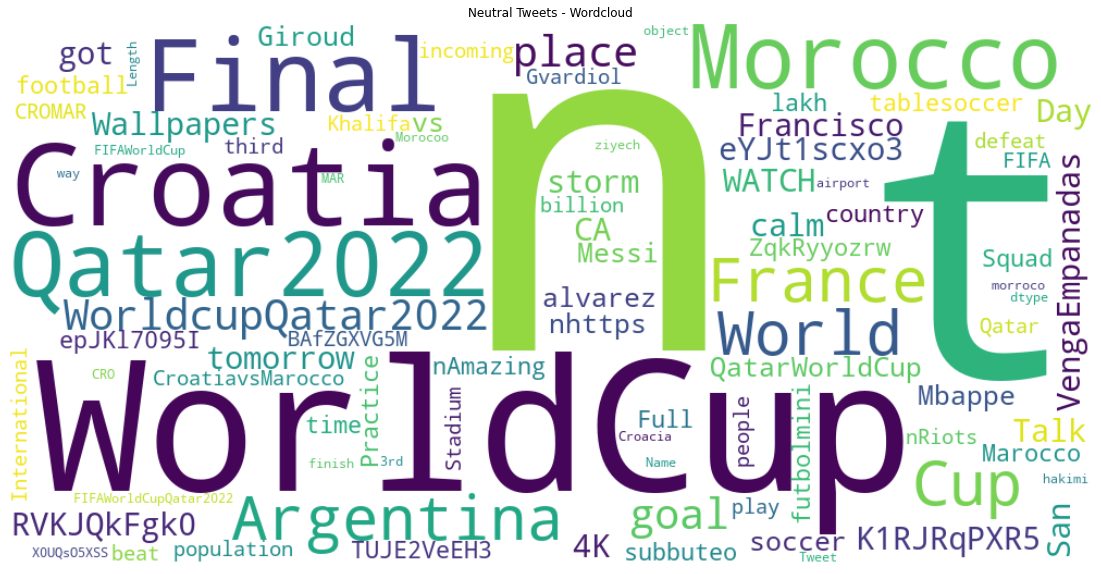

In [29]:
# Wordcloud with Neutral tweets
positive_tweets = tweets_sentiment_df['Tweet'][tweets_sentiment_df["Sentiment"] == 'neutral']
stop_words = ["https", "co", "RT", "WorldCup2022"] + list(STOPWORDS)
positive_wordcloud = WordCloud(width=1000, height=500, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure(figsize=[20,10])
plt.title("Neutral Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()